In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df1 = pd.read_csv('test1.csv')
df1.head()

,X,X2,X3,X4,X5,Y2,Y3,Y4,Y5
0,0.004,0.000016,6.400000e-08,2.560000e-10,1.020000e-12,0.004016,0.004016,0.004016,0.004016
1,0.008,0.000064,5.120000e-07,4.100000e-09,3.280000e-11,0.008064,0.008065,0.008065,0.008065
2,0.012,0.000144,1.730000e-06,2.070000e-08,2.490000e-10,0.012144,0.012146,0.012146,0.012146
3,0.016,0.000256,4.100000e-06,6.550000e-08,1.050000e-09,0.016256,0.016260,0.016260,0.016260
4,0.020,0.000400,8.000000e-06,1.600000e-07,3.200000e-09,0.020400,0.020408,0.020408,0.020408


In [4]:
df250 = pd.read_csv('test250.csv')
df250.head()

,X,X2,X3,X4,X5,Y2,Y3,Y4,Y5
0,1,1,1,1,1.0,2,3,4,5.0
1,2,4,8,16,32.0,6,14,30,62.0
2,3,9,27,81,243.0,12,39,120,363.0
3,4,16,64,256,1024.0,20,84,340,1364.0
4,5,25,125,625,3125.0,30,155,780,3905.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


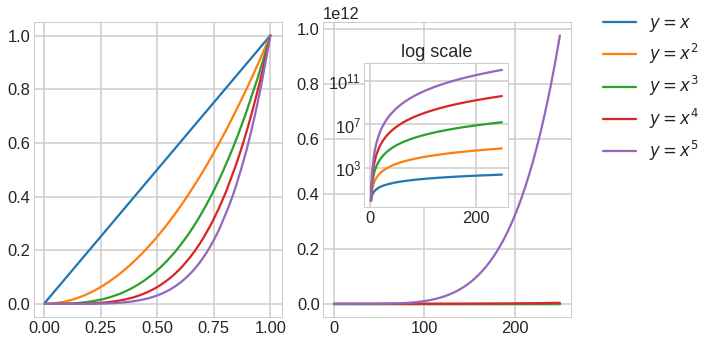

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
axin = inset_axes(ax[1], width=2, height=2, loc='upper left', borderpad=2.5)

ax[0].plot(df1['X'], df1['X'], label=r'$ y=x $')
ax[0].plot(df1['X'], df1['X2'], label=r'$ y=x^2 $')
ax[0].plot(df1['X'], df1['X3'], label=r'$ y=x^3 $')
ax[0].plot(df1['X'], df1['X4'], label=r'$ y=x^4 $')
ax[0].plot(df1['X'], df1['X5'], label=r'$ y=x^5 $')

axin.plot(df250['X'], df250['X'], label=r'$ y=x $')
axin.plot(df250['X'], df250['X2'], label=r'$ y=x^2 $')
axin.plot(df250['X'], df250['X3'], label=r'$ y=x^3 $')
axin.plot(df250['X'], df250['X4'], label=r'$ y=x^4 $')
axin.plot(df250['X'], df250['X5'], label=r'$ y=x^5 $')

axin.set_yscale('log')
axin.set_title('log scale')

ax[1].plot(df250['X'], df250['X'], label=r'$ y=x $')
ax[1].plot(df250['X'], df250['X2'], label=r'$ y=x^2 $')
ax[1].plot(df250['X'], df250['X3'], label=r'$ y=x^3 $')
ax[1].plot(df250['X'], df250['X4'], label=r'$ y=x^4 $')
ax[1].plot(df250['X'], df250['X5'], label=r'$ y=x^5 $')


ax[1].legend(loc=[1,0.5], bbox_to_anchor=(1.1, 0.5))
plt.tight_layout()
plt.savefig('7_pcc_1.png')

In [9]:
df1[['X', 'X2', 'X3', 'X4', 'X5']].corr(method='pearson')

,X,X2,X3,X4,X5
X,1.000000,0.968488,0.916895,0.866540,0.821142
X2,0.968488,1.000000,0.986027,0.958392,0.927079
X3,0.916895,0.986027,1.000000,0.992182,0.975012
X4,0.866540,0.958392,0.992182,1.000000,0.994974
X5,0.821142,0.927079,0.975012,0.994974,1.000000


In [10]:
df250[['X', 'X2', 'X3', 'X4', 'X5']].corr(method='pearson')

,X,X2,X3,X4,X5
X,1.000000,0.968488,0.916925,0.866519,0.821187
X2,0.968488,1.000000,0.986042,0.958378,0.927114
X3,0.916925,0.986042,1.000000,0.992164,0.975016
X4,0.866519,0.958378,0.992164,1.000000,0.994991
X5,0.821187,0.927114,0.975016,0.994991,1.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [54]:
def calc_featimps(df):
    
    featimps = {}
    for i in range(2,6):
        y = df1[f'Y{i}']
        x = df1.iloc[:,:i]
        print(f'X features={x.columns.tolist()}, Y={y.name}')

        featimp = pd.DataFrame()

        for j in range(100):
            X_train, X_test, y_train, y_test = train_test_split(x, y)
            rf = RandomForestRegressor()
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            r2 = r2_score(y_test, y_pred)

            featimp_ = pd.Series(rf.feature_importances_, index=X_train.columns, name=f'{j}')
            featimp = pd.concat([featimp, featimp_], axis=1)

        featimps[f'{i}'] = featimp  
    
    return featimps

In [55]:
featimps1 = calc_featimps(df1)

X features=['X', 'X2'], Y=Y2
X features=['X', 'X2', 'X3'], Y=Y3
X features=['X', 'X2', 'X3', 'X4'], Y=Y4
X features=['X', 'X2', 'X3', 'X4', 'X5'], Y=Y5


In [82]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.default'] = 'it'  

font_title = {'fontsize': 15,
              'fontweight' : plt.rcParams['axes.titleweight'],
              'verticalalignment': 'center',
              'horizontalalignment': 'center'}
pad_title = 12

font_label = {'verticalalignment': 'bottom',
             'horizontalalignment': 'center'}
pad_label = 20

In [90]:
def plot_featimps(filenumber):
    fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(10,4))
    xlabels = [r'$ X $', r'$ X^2 $', r'$ X^3 $', r'$ X^4 $', r'$ X^5 $']
    for i, ax in enumerate(axes):
        labels = featimps[f'{i+2}'].index.tolist()
        print(labels)

        positions=np.arange(i+2).tolist()
        ax.violinplot([featimps[f'{i+2}'].loc[idx] for idx in labels], 
                      showextrema=False, positions=positions)
        ax.errorbar(labels, featimps[f'{i+2}'].mean(axis=1), yerr=featimps[f'{i+2}'].std(axis=1), 
                    fmt='o', mec=f'C{i}', mew=3, mfc='w', ms=15,
                   lw=2, c=f'C{i}')

        ax.set_xlim((-0.5, i+1.5))
        ax.set_xticks(np.arange(i+2))
        ax.set_xticklabels(xlabels[:i+2], fontdict=font_label)
        ax.tick_params(axis='x', which='major', pad=pad_label)

    axes[0].set_ylim((0.3, 0.7))
    axes[1].set_ylim((0.2, 0.5))
    axes[2].set_ylim((0.1, 0.4))
    axes[3].set_ylim((0.1, 0.3))

    axes[0].set_title(r'$Y=X+X^2$', fontdict=font_title, pad=pad_title)
    axes[1].set_title(r'$Y=X+X^2+X^3$', fontdict=font_title, pad=pad_title)
    axes[2].set_title(r'$Y=X+X^2 $      '+'\n' + r'$ +X^3+X^4$', fontdict=font_title, pad=pad_title)
    axes[3].set_title(r'$Y=X+X^2 $             '+'\n' + r'$ +X^3+X^4+X^5$', fontdict=font_title, pad=pad_title)

    plt.tight_layout()
    plt.savefig(f'7_pcc_{str(filenumber)}.png')

['X', 'X2']
['X', 'X2', 'X3']
['X', 'X2', 'X3', 'X4']
['X', 'X2', 'X3', 'X4', 'X5']


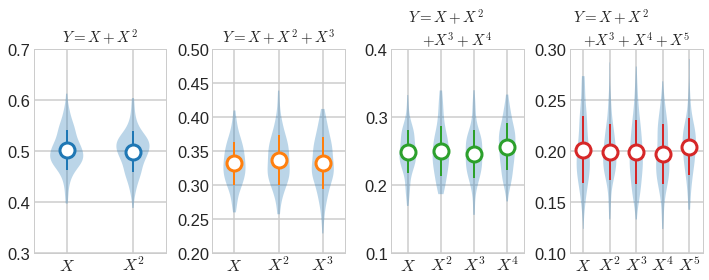

In [91]:
plot_featimps(2)

In [59]:
featimps250 = calc_featimps(df250)

X features=['X', 'X2'], Y=Y2
X features=['X', 'X2', 'X3'], Y=Y3
X features=['X', 'X2', 'X3', 'X4'], Y=Y4
X features=['X', 'X2', 'X3', 'X4', 'X5'], Y=Y5


['X', 'X2']
['X', 'X2', 'X3']
['X', 'X2', 'X3', 'X4']
['X', 'X2', 'X3', 'X4', 'X5']


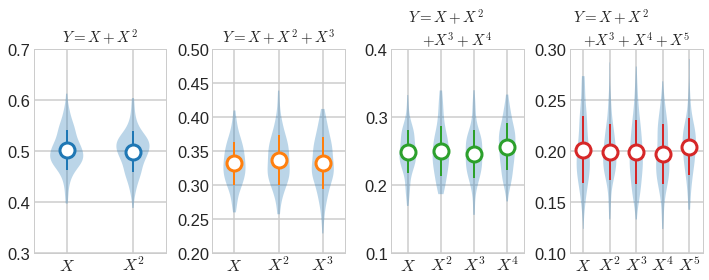

In [85]:
plot_featimps(4)